In [ ]:
#Email spam or not??
'''
step1: Data collection then loading the data
step2: Data cleaning (it is already done)
step3: Data splitting (scale them first)
step4: model training
step5: visualisation
step6: model testing
step7: prediction
'''

In [2]:
import pandas as pd
columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'label'
]
df=pd.read_csv(r"C:\Users\AARUSHI TANDON\Downloads\spambase\spambase.data", header=None, names=columns)
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [3]:
X=df.drop('label', axis=1) #axis=1 means you have to operate along the columns, columns are on axis 1 and rows are on axis 0
y=df['label']
X_min, X_max= X.min(), X.max()
X_scaled=(X-X_min)/(X_max-X_min)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3680, 57)
X_test shape:  (921, 57)
y_train shape:  (3680,)
y_test shape:  (921,)


In [4]:
#model training
#1. define sigmoid
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
w=np.zeros(X_train.shape[1]) #cuz every feature has diff w, like w1 for x1, w2 for x2 and so on
b=0

In [24]:
def propagate(w,b, X, y):
    m=X.shape[0]
    z=np.dot(X,w)+b
    A=sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
    dw = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)
    grads={"dw": dw, "db": db}
    return grads, cost
    

In [25]:
#gradient descent
def optimize(w, b, X, y, epochs, learning_rate):
    costs=[]
    for i in range(epochs):
        grads, cost = propagate(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]

        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost:.4f}")

    return w, b, costs

Cost after iteration 0: 0.2936
Cost after iteration 100: 0.2902
Cost after iteration 200: 0.2871
Cost after iteration 300: 0.2843
Cost after iteration 400: 0.2817
Cost after iteration 500: 0.2793
Cost after iteration 600: 0.2771
Cost after iteration 700: 0.2751
Cost after iteration 800: 0.2732
Cost after iteration 900: 0.2714
Cost after iteration 1000: 0.2697
Cost after iteration 1100: 0.2681
Cost after iteration 1200: 0.2666
Cost after iteration 1300: 0.2652
Cost after iteration 1400: 0.2638
Cost after iteration 1500: 0.2626
Cost after iteration 1600: 0.2613
Cost after iteration 1700: 0.2602
Cost after iteration 1800: 0.2591
Cost after iteration 1900: 0.2580


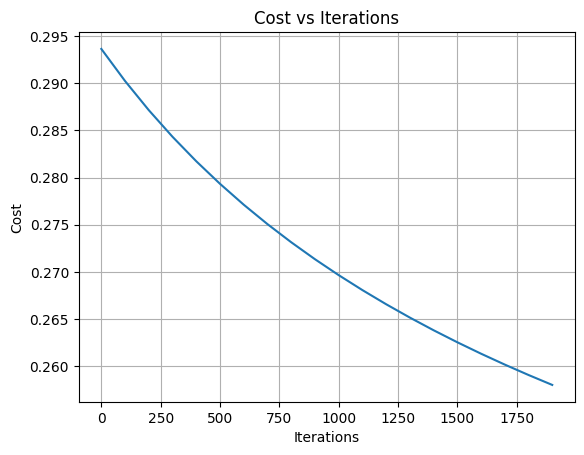

In [38]:
import matplotlib.pyplot as plt

epochs = 2000
learning_rate = 2.7

# Train
w, b, costs = optimize(w, b, X_train, y_train, epochs, learning_rate)

# Plot
plt.plot(range(0, len(costs)*100, 100), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.show()



In [39]:
#prediction function
def predict(w, b, X):
    z=np.dot(X, w)+b
    y_pred_prob=sigmoid(z)
    y_pred=y_pred_prob>0.5
    return y_pred.astype(int)
y_pred_test = predict(w, b, X_test)


In [40]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

acc = accuracy(y_test, y_pred_test)
print(f"Test Accuracy: {acc:.2f}%")


Test Accuracy: 90.12%
